In [16]:
import tqdm
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

tqdm.tqdm.pandas()

In [2]:
MIN_MOUSE_TRACK_LEN = 100

In [71]:
df = pd.read_pickle('../sw-analysis/out/sw_139_data.pickle')
df = df[df.mouse_track.apply(len) >= MIN_MOUSE_TRACK_LEN]
df.head()

,cookie,tid,mouse_track
0,3688fee1aeab4e2094ed595c3228c81a,9d162c3d-fa53-4728-86fc-942cf5adfc99,"[[0, 427, 264], [5, 424, 267], [6, 422, 270], ..."
1,f8ed164771724999bd56a860d95ba34b,b1f04b5d-3af8-40af-a15a-a9112bfa375b,"[[0, 50, 117], [6, 47, 120], [10, 43, 125], [5..."
4,e8ee0f31568c4a5fa574703c6bb3fbe9,58f298d9-840f-41b8-426f-a0036be8e54a,"[[0, 838, 269], [19, 838, 276], [5, 837, 280],..."
6,4702372550e74a22aec3d90ce205c6bd,46c34ccb-4f9c-4d21-9099-670a9a725509,"[[0, 98, 298], [126, 98, 298], [3817, 230, 304..."
9,3ec5aa8934b341e7b98e98b81226e63d,93f1d1e3-2250-4a03-c215-1216124ad5fd,"[[0, 310, 416], [9, 310, 412], [1, 309, 398], ..."


In [72]:
def preprocess_row(row):
    mouse_track = row.mouse_track
    t_track, x_track, y_track = mouse_track[:,0], mouse_track[:,1], mouse_track[:,2]
    t_track[t_track == 0] = 1
    row['t_delta'] = t_track[1:]
    row['x_delta'] = abs(x_track[1:] - x_track[:-1])
    row['y_delta'] = abs(y_track[1:] - y_track[:-1])
    return row

df = df.progress_apply(preprocess_row, axis=1)

100%|██████████| 174744/174744 [07:59<00:00, 364.79it/s]


In [73]:
df = df[['cookie', 't_delta', 'x_delta', 'y_delta']].copy()
df['d_delta'] = (df.x_delta ** 2 + df.y_delta ** 2) ** 0.5
df['m_delta'] = df.d_delta / df.t_delta
df.m_delta = df.m_delta.apply(lambda x: x[~np.isnan(x)])

df['t_mean'] = df.t_delta.apply(np.mean)
df['t_median'] = df.t_delta.apply(np.median)
df['t_std'] = df.t_delta.apply(np.std)
df['t_max'] = df.t_delta.apply(np.max)
df['t_min'] = df.t_delta.apply(np.min)

df['x_mean'] = df.x_delta.apply(np.mean)
df['x_median'] = df.x_delta.apply(np.median)
df['x_std'] = df.x_delta.apply(np.std)
df['x_max'] = df.x_delta.apply(np.max)
df['x_min'] = df.x_delta.apply(np.min)

df['y_mean'] = df.y_delta.apply(np.mean)
df['y_median'] = df.y_delta.apply(np.median)
df['y_std'] = df.y_delta.apply(np.std)
df['y_max'] = df.y_delta.apply(np.max)
df['y_min'] = df.y_delta.apply(np.min)

df['d_mean'] = df.d_delta.apply(np.mean)
df['d_median'] = df.d_delta.apply(np.median)
df['d_std'] = df.d_delta.apply(np.std)
df['d_max'] = df.d_delta.apply(np.max)
df['d_min'] = df.d_delta.apply(np.min)

df['m_mean'] = df.m_delta.apply(np.mean)
df['m_median'] = df.m_delta.apply(np.median)
df['m_std'] = df.m_delta.apply(np.std)
df['m_max'] = df.m_delta.apply(np.max)
df['m_min'] = df.m_delta.apply(np.min)

In [75]:
df = df.drop(['t_delta', 'x_delta', 'y_delta', 'd_delta', 'm_delta'], axis=1)
df.head()

,cookie,t_mean,t_median,t_std,t_max,t_min,x_mean,x_median,x_std,x_max,...,d_mean,d_median,d_std,d_max,d_min,m_mean,m_median,m_std,m_max,m_min
0,3688fee1aeab4e2094ed595c3228c81a,51.594595,6.0,295.739732,3596,2,2.563063,1.0,3.624626,16,...,5.833951,2.236068,20.009934,284.176002,1.0,0.682665,0.386339,0.725518,3.847799,0.000278
1,f8ed164771724999bd56a860d95ba34b,62.931034,8.0,588.039861,7106,1,2.800000,1.0,3.547899,22,...,3.875739,1.414214,6.009707,61.000000,1.0,0.527588,0.202031,1.060186,11.704700,0.001522
4,e8ee0f31568c4a5fa574703c6bb3fbe9,11.012195,2.5,70.906560,1304,1,1.242160,0.0,3.081738,19,...,2.253394,0.000000,4.804062,36.715120,0.0,0.417036,0.000000,1.143893,18.179659,0.000000
6,4702372550e74a22aec3d90ce205c6bd,769.428571,18.0,2539.603236,17771,10,18.310714,1.0,74.700927,867,...,29.558380,5.099020,88.741149,916.784053,0.0,0.248707,0.176471,0.236646,1.086534,0.000000
9,3ec5aa8934b341e7b98e98b81226e63d,320.630769,17.0,1875.616402,24051,1,12.271795,4.0,34.110123,361,...,27.972749,6.082763,77.749513,537.401154,0.0,1.964477,0.285714,18.022418,252.049598,0.000000


In [108]:
df.to_pickle('../sw-analysis/out/sw_139_baseline_features.pickle')

In [106]:
from sklearn.manifold import TSNE

top_cookies = set(df.cookie.value_counts().nlargest(5).keys())

X = df[df.cookie.isin(top_cookies)].drop('cookie', axis=1).to_numpy()
X_embedded = TSNE(n_components=2).fit_transform(X)

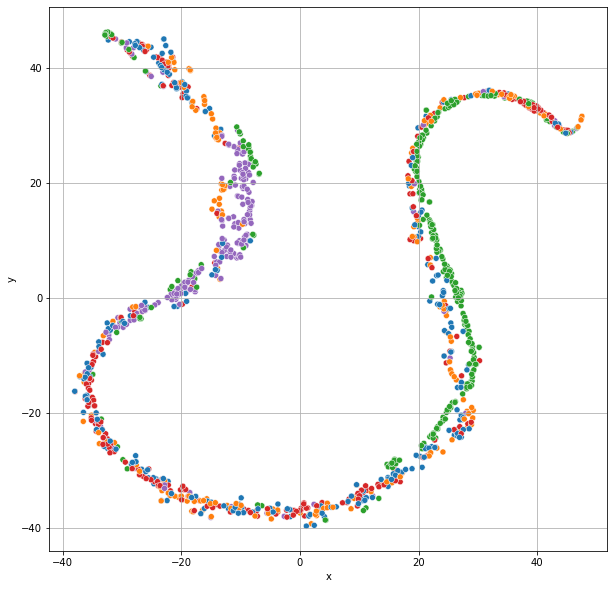

In [107]:
dff = pd.DataFrame()
dff['x'] = X_embedded[:,0]
dff['y'] = X_embedded[:,1]
dff['label'] = df[df.cookie.isin(top_cookies)].cookie.values

_ = plt.figure(figsize=(10, 10))
_ = sns.scatterplot(data=dff, x='x', y='y', hue='label', legend=False)
plt.grid(True)